In [1]:
#Tutorial from https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
from keras.models import Sequential, Model
from keras.layers import Dense, Concatenate, Input
from keras.utils.vis_utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


## 1. Example Model

We can start off by defining a simple multilayer Perceptron model in Keras that we can use as the subject for summarization and visualization.

The model we will define has one input variable, a hidden layer with two neurons, and an output layer with one binary output. The code for this network is provided below.

In [2]:
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 2. Summarize Model

Keras provides a way to summarize a model.

The summary is textual and includes information about:

The layers and their order in the model.
The output shape of each layer.
The number of parameters (weights) in each layer.
The total number of parameters (weights) in the model.
The summary can be created by calling the **summary()** function on the model that returns a string that in turn can be printed.

In [3]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


## 3. Visualize Model

The summary is useful for simple models, but can be confusing for models that have multiple inputs or outputs.

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The **plot_model()** function in Keras will create a plot of your network. This function takes a few useful arguments:

$\bullet$ model: (required) The model that you wish to plot.

$\bullet$ to_file: (required) The name of the file to which to save the plot.

$\bullet$ show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.

$\bullet$ show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.

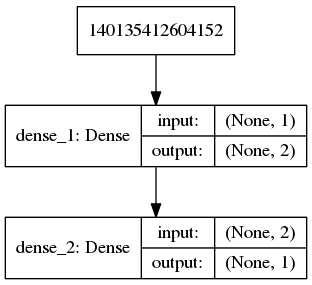

In [4]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image("model_plot.png")

We used the module *IPython.display* to show the model here, but this image is algo saved in png with the **plot_model()** function. The first number doesn't mean anything, is just that the input is not initialized.

## 4. Best Practice Tips

It is generally recommended to always create a summary and a plot of your neural network model in Keras. This is recommend for a few reasons:

$\bullet$ Confirm layer order. It is easy to add layers in the wrong order with the sequential API or to connect them together incorrectly with the functional API. The graph plot can help you confirm that the model is connected the way you intended.

$\bullet$ Confirm the output shape of each layer. It is common to have problems when defining the shape of input data for complex networks like convolutional and recurrent neural networks. The summary and plot can help you confirm the input shape to the network is as you intended.

$\bullet$ Confirm parameters. Some network configurations can use far fewer parameters, such as the use of a TimeDistributed wrapped Dense layer in an Encoder-Decoder recurrent neural network. Reviewing the summary can help spot cases of using far more parameters than expected.

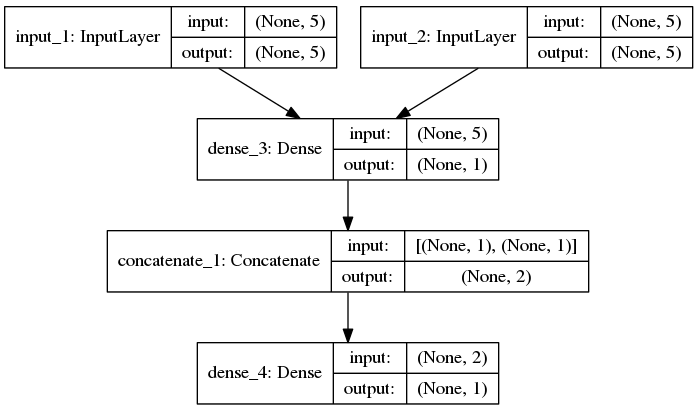

In [5]:
#EXTRA 1
#This code is from https://stackoverflow.com/questions/49875127/share-weights-between-two-dense-layers-in-keras
#The idea is that two dense layers share the same weights.
ip_shape1 = Input(shape=(5,))
ip_shape2 = Input(shape=(5,))

dense = Dense(1, activation = "sigmoid", kernel_initializer = "ones")

op1 = dense(ip_shape1)
op2 = dense(ip_shape2)

merge_layer = Concatenate()([op1, op2])
predictions = Dense(1, activation='sigmoid')(merge_layer)

model2 = Model(inputs=[ip_shape1, ip_shape2], outputs=predictions)

plot_model(model2, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)
Image("model_plot2.png")

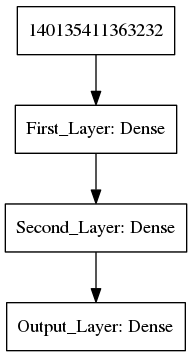

In [6]:
#EXTRA 2
#We can create names to each layer and plot the model with the names created. If we don't names, the program 
#will generate names automatically as before (like `input_1`, `dense_3`, etc). 
#If we set show_shapes and show_layer_names to False, we get a succinct plot with less information. Sometimes 
#this can be useful.

#Plot of the model with the names and no shapes.
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu', name='First_Layer'))
model.add(Dense(5, activation='relu', name='Second_Layer'))
model.add(Dense(1, activation='sigmoid', name='Output_Layer'))
plot_model(model, to_file='model_plot_names.png', show_shapes=False, show_layer_names=True)
Image("model_plot_names.png")

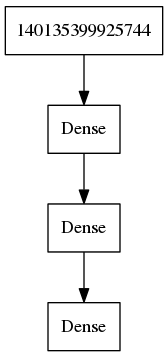

In [7]:
#Succinct plot of the model. Only the type of the layer is showed.
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu', name='First_Layer'))
model.add(Dense(5, activation='relu', name='Second_Layer'))
model.add(Dense(1, activation='sigmoid', name='Output_Layer'))
plot_model(model, to_file='model_plot_succinct.png', show_shapes=False, show_layer_names=False)
Image("model_plot_succinct.png")